In [1]:
#!/usr/bin/python

import numpy as np
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mp
import datetime
import os
#import seaborn as sns
#sns.set()
import warnings
warnings.filterwarnings('ignore')


import sys
sys.path.append('/home2/datahome/cdemarez/MODULES_PY') 

from tools import *

from croco_tools_cdm import *
from plot_tools import *

In [2]:
pathsave_flux='./'

In [3]:
nc =Dataset(pathsave_flux+'/flux_by_detrending_all.nc') 
steps=nc.variables['time'][:]
xx=nc.variables['x'][:]
yy=nc.variables['y'][:]
zz_dz=nc.variables['z'][:]
lon2_new=nc.variables['lon'][:]
lat2_new=nc.variables['lat'][:]
h_new=nc.variables['h'][:]

u_prime_dz=nc.variables['u_p'][:]  #computed every 12 hours on 127 sig-levs ('dz grid')
v_prime_dz=nc.variables['v_p'][:]
w_prime_dz=nc.variables['w_p'][:]
rho_prime_dz=nc.variables['rho_p'][:]
P_prime=nc.variables['P_p'][:]

nc.close()


In [4]:
corners_flux=[-79.5,30.8,-77.7,32.18]

In [5]:
dx_flux=np.gradient(xx,axis=1)
dy_flux=np.gradient(yy,axis=0)
dz_flux=np.gradient(zz_dz,axis=0)

FeX=u_prime_dz*P_prime
FeY=v_prime_dz*P_prime
FeZ=w_prime_dz*P_prime
rho0=1024
FmZ=rho0*np.sqrt((u_prime_dz*w_prime_dz)**2+(v_prime_dz*w_prime_dz)**2)
U_prime=np.sqrt(u_prime_dz**2+v_prime_dz**2)

In [6]:
ilev_max=20
print('min depth for mean =',np.nanmean(zz_dz[0]))
print('max depth for mean =',np.nanmean(zz_dz[ilev_max]))

('min depth for mean =', -576.14526)
('max depth for mean =', -421.83728)


In [7]:
FeZ_mean=np.nanmean(FeZ,axis=0)
FeZ_meanh=np.nanmean(FeZ_mean[:ilev_max],axis=0)


In [8]:
FmZ_mean=np.nanmean(FmZ,axis=0)
FmZ_meanh=np.nanmean(FmZ_mean[:ilev_max],axis=0)

In [9]:
FmZ_maxh=np.nanmax(FmZ_mean,axis=0)
FeZ_maxh=np.nanmax(FeZ_mean,axis=0)

In [10]:
corners_lil1=[-79.4,31.45,-78.9,31.8]
corners_lil3=[-78.8,31.3,-78,31.7]

In [11]:
def take_area_3D(var,corners,lons,lats,z):

    take1=lons<corners[2]
    take2=lons>corners[0]
    take3=lats<corners[3]
    take4=lats>corners[1]
    take=take1&take2&take3&take4
    print(var.shape)
    
    return np.mean(var[:,take],axis=1),np.mean(z[:,take],axis=1)

In [12]:
FeZ_lil1,z_lil1=take_area_3D(FeZ_mean,corners_lil1,lon2_new,lat2_new,zz_dz)
FeZ_lil3,z_lil3=take_area_3D(FeZ_mean,corners_lil3,lon2_new,lat2_new,zz_dz)

(127, 235, 306)
(127, 235, 306)


In [13]:
FmZ_lil1,z_lil1=take_area_3D(FmZ_mean,corners_lil1,lon2_new,lat2_new,zz_dz)
FmZ_lil3,z_lil3=take_area_3D(FmZ_mean,corners_lil3,lon2_new,lat2_new,zz_dz)

(127, 235, 306)
(127, 235, 306)


In [14]:
#load Fr calcultation

nc =Dataset('./Fr_map.nc') 


print(nc.variables.keys())
x_Fr = nc.variables['x'][:] 
y_Fr = nc.variables['y'][:] 
Fr = nc.variables['Fr_lee_mean'][:]
h_peak_var = nc.variables['h_peak'][:]
eps_mean = nc.variables['eps_mean'][:]
nc.close()


corners_Fr=[-79.5,30.8,-77.7,32.18]
dlatp=np.abs(corners_Fr[1]-corners_Fr[3])
dlonp=np.abs(corners_Fr[0]-corners_Fr[2])

[u'x', u'y', u'Fr_lee', u'Fr_lee_mean', u'h_peak', u'eps_mean']


In [15]:
map = Basemap(llcrnrlon=corners_Fr[0],llcrnrlat=corners_Fr[1],urcrnrlon=corners_Fr[2],urcrnrlat=corners_Fr[3],resolution='c',projection='merc')
xmap, ymap = map(lon2_new, lat2_new)


In [16]:
def plot_corners(corners_lil,name,col):
        tmpx,tmpy=map(corners_lil[::2],corners_lil[1::2])
        tmpx=np.array(tmpx)/1e3
        tmpy=np.array(tmpy)/1e3
        import matplotlib.patches as patches
        ##areas for small areas
        rect = patches.Rectangle((tmpx[0],tmpy[0]),
                             tmpx[1]-tmpx[0],tmpy[1]-tmpy[0],
                             linestyle='--',lw=2,
                             edgecolor=col,fill=None,alpha=0.8,
                             zorder=15)
        ax.add_patch(rect)
        
        t=ax.annotate(name, xy=((tmpx[1]+tmpx[0])/2.,(tmpy[1]+tmpy[0])/2.),xycoords='data',ha='center', va='center',size=20,color=col)
        

## Figure

save
show


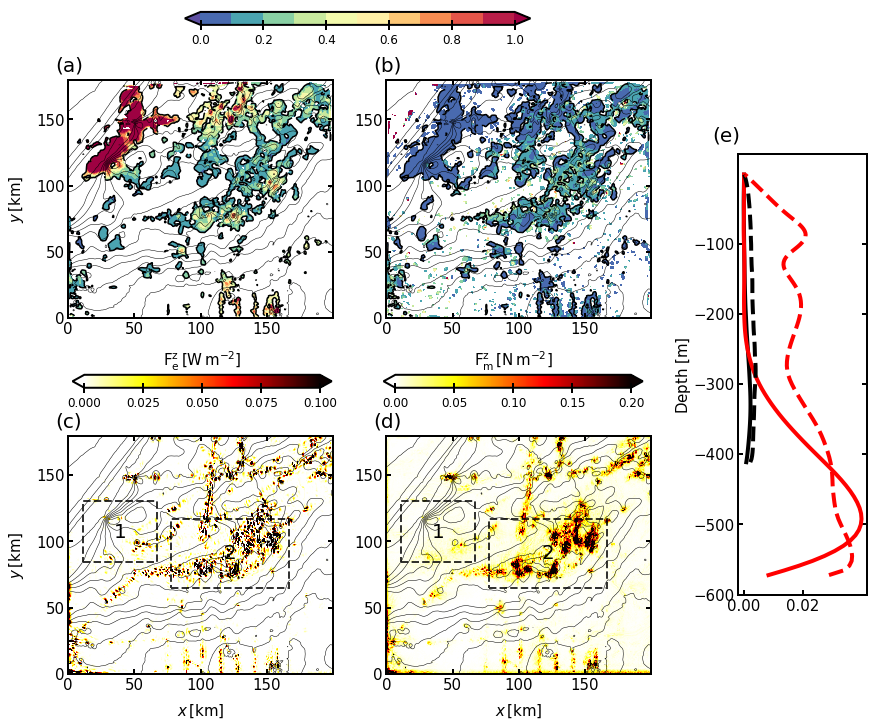

In [44]:
rast=True

fig=plt.figure(figsize=(12,12))


for ip in range(4):
    


    ax=plt.subplot(2,2,ip+1,aspect='equal',fc='w')

    ax.spines['top'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

    conts_h=[0,10]
    conts_adim=np.linspace(0,1,11)
    if ip==0:
        toplot=(np.where(h_peak_var<10,np.nan,Fr))
        pc1=plt.contourf(x_Fr/1000,y_Fr/1000,toplot,conts_adim,cmap='Spectral_r',extend='both',rasterized=rast)
        plt.contour(x_Fr/1e3,y_Fr/1e3,h_peak_var,conts_h,zorder=100,colors='k',rasterized=rast)
    if ip==1:
        toplot=(np.where(h_peak_var<10,np.nan,eps_mean*2*np.pi))
        pc2=plt.contourf(x_Fr/1000,y_Fr/1000,toplot,conts_adim,cmap='Spectral_r',extend='both',rasterized=rast)
        plt.contour(x_Fr/1e3,y_Fr/1e3,h_peak_var,conts_h,zorder=100,colors='k',rasterized=rast)
    if ip==2:
        pc3=plt.pcolormesh(xmap/1e3,ymap/1e3,FeZ_meanh,vmin=0,vmax=0.1,cmap='hot_r',rasterized=rast)
        plot_corners(corners_lil1,'1','k')
        plot_corners(corners_lil3,'2','k')
    if ip==3:
        pc4=plt.pcolormesh(xmap/1e3,ymap/1e3,FmZ_maxh,vmin=0,vmax=0.2,cmap='hot_r',rasterized=rast)
        plot_corners(corners_lil1,'1','k')
        plot_corners(corners_lil3,'2','k')

    plt.contour(xmap/1e3,ymap/1e3,h_new,np.arange(0,1000,50),colors='k',linewidths=0.5,rasterized=rast)
    if ip==0 or ip==2:
        plt.ylabel(r'$y\, {\rm [km]}$',fontsize=15,labelpad=10,rotation=90)
    if ip==2 or ip==3:
        plt.xlabel(r'$x\, {\rm [km]}$',fontsize=15,labelpad=10,rotation=0)
    plt.yticks(np.arange(0,np.max(y_Fr/1000),50),fontsize=15,rasterized=rast)
    plt.xticks(np.arange(0,200,50),fontsize=15,rasterized=rast)
    ax.tick_params(direction='in',width=2,length=5,bottom=1,top=1,left=1,right=1) 
    plt.axis([0,np.max(x_Fr/1000),0,np.max(y_Fr/1000)])

    let=['(a)','(b)','(c)','(d)']
    t=plt.annotate(let[ip], xy=(-0.05, 1.02),
                xycoords='axes fraction',ha='left', va='bottom',
                size=20)
    
    
    
    
cbar_ax = fig.add_axes([0.26, 0.91, 0.4, 0.015])
cbar=fig.colorbar(pc1, cax=cbar_ax,extend='both',orientation='horizontal',ticks=np.arange(-5,5,0.2))
#cbar.set_label(r"${\rm log(NH/U)}$", fontsize=20, 	rotation=-90,labelpad=25)
#cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.set_offset_position('left')
cbar.update_ticks()
cbar.outline.set_linewidth(2)
cbar_ax.tick_params(direction='inout',width=2,length=10,labelsize=12)
    
    
cbar_ax = fig.add_axes([0.13, 0.49, 0.3, 0.015])
cbar=fig.colorbar(pc3, cax=cbar_ax,extend='both',orientation='horizontal',ticks=np.arange(-5,5,0.025))
cbar.set_label(r"${\rm F_e^z\,[W\,m^{-2}]}$", fontsize=15, 	rotation=0,labelpad=-60)
#cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.set_offset_position('left')
cbar.update_ticks()
cbar.outline.set_linewidth(2)
cbar_ax.tick_params(direction='inout',width=2,length=10,labelsize=12)
   
cbar_ax = fig.add_axes([0.49, 0.49, 0.3, 0.015])
cbar=fig.colorbar(pc4, cax=cbar_ax,extend='both',orientation='horizontal',ticks=np.arange(-5,5,0.05))
cbar.set_label(r"${\rm F_m^z\,[N\,m^{-2}]}$", fontsize=15, 	rotation=0,labelpad=-60)
#cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.set_offset_position('left')
cbar.update_ticks()
cbar.outline.set_linewidth(2)
cbar_ax.tick_params(direction='inout',width=2,length=10,labelsize=12)





ax = fig.add_axes([0.9, 0.25, 0.15, 0.51],fc='w')
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.plot(FeZ_lil1,z_lil1,'-k',lw=4,label='FeZ area 1',rasterized=rast)
plt.plot(FeZ_lil3,z_lil3,'-r',lw=4,label='FeZ area 2',rasterized=rast)


plt.plot(FmZ_lil1,z_lil1,'--k',lw=4,label='FmZ area 1',rasterized=rast)
plt.plot(FmZ_lil3,z_lil3,'--r',lw=4,label='FmZ area 2',rasterized=rast)

t=plt.annotate('(e)', xy=(-0.2, 1.02),
                xycoords='axes fraction',ha='left', va='bottom',
                size=20)

plt.ylabel(r'Depth ${\rm [m]}$',fontsize=15,labelpad=0,rotation=90)
#plt.xlabel(r'$ {\rm [W\,m^{-2}]\, / \,[N\,m^{-2}] }$',fontsize=15,labelpad=-20,rotation=0,rasterized=rast)
plt.yticks(np.arange(-600,0,100),fontsize=15,rasterized=rast)
plt.xticks(np.arange(0,4e-2,2e-2),fontsize=15,rasterized=rast)
ax.tick_params(direction='in',width=2,length=5,bottom=1,top=0,left=1,right=1) 


plt.subplots_adjust(right=0.8)






#plt.savefig('tmp_fig4.png',dpi=200)
print('save')
plt.savefig('./Flux_map.pdf',dpi=200,bbox_inches='tight')
print('show')
plt.show()